In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [25]:
cost = lambda X,y,t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X,y,t : 2 * X.T @ (X @ t - y) / len(y)
def linreg(X, y, t, cost, grad, a=0.1, n=100, onStep=None):
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if onStep:
            onStep(t)

    return t,costs

TASK 1.1

In [34]:
data = np.genfromtxt('kc.csv',delimiter=',',skip_header=1)
X = data[:,5]
y = data[:,2]

X = X.reshape(-1,1) # variable de la columna de squirt fit
y = y.reshape(-1,1) # variable de la columna de precio

Xr = np.hstack((np.ones_like(X),X))


#Shapes de la data
print(Xr.shape,y.shape)


(21613, 2) (21613, 1)


Task 1.2

In [38]:
#Realizar la regresion lineal

#Se define un valor random para poder incializar el t0
datasize = data.shape[0]
t0 = np.random.rand(Xr.shape[1],1)
tf, costs = linreg(Xr,y,t0,cost,grad,a=0.00000001,n=50)

xm = np.array([[0], [datasize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos ym 
ym = xmr @ tf



Xr = np.hstack((
    Xr,
    X.reshape((Xr.shape[0],1))**1
))



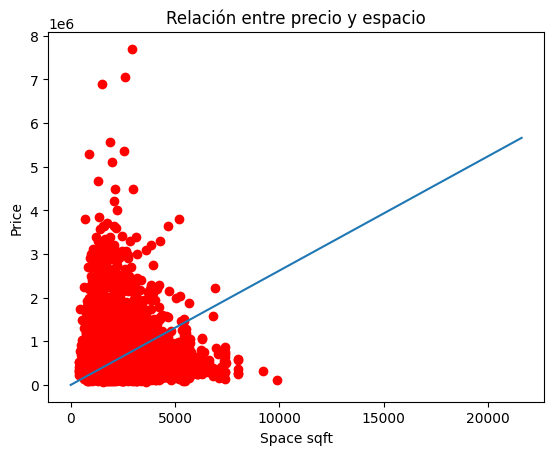

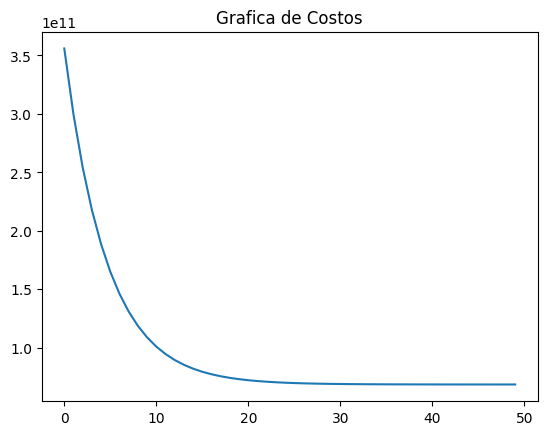

In [41]:
plt.plot(X, y, 'ro')
plt.plot(xm, ym)
plt.title("Relación entre precio y espacio")
plt.xlabel('Space sqft')
plt.ylabel('Price')
plt.show()

plt.plot(costs)
plt.title("Grafica de Costos")
plt.show()

Task 1.4

In [42]:
##Cros-validation-results
import random as ran


ran.shuffle(X)
n = len(X)
idx1 = int(np.round(n*0.4))
idx2 = int(np.round(n*0.2))

training, cross_validation, test = np.split(data,[idx1,idx2])

def cross_validate(X, y, k, cost, grad, a=0.1, n=100):
    # Dividir los datos en k grupos (folds)
    fold_size = len(y) // k
    errors = []
    for i in range(k):
        # Seleccionar los datos para el fold i
        fold_start = i * fold_size
        fold_end = (i+1) * fold_size
        X_test = X[fold_start:fold_end]
        y_test = y[fold_start:fold_end]

        # Seleccionar los datos para entrenamiento
        X_train = np.concatenate((X[:fold_start], X[fold_end:]), axis=0)
        y_train = np.concatenate((y[:fold_start], y[fold_end:]))

        # Entrenar modelo en los datos de entrenamiento
        t = np.zeros(X_train.shape[1])
        for j in range(n):
            t -= a * grad(X_train, y_train, t)

        # Calcular el error en los datos de prueba
        error = cost(X_test, y_test, t)
        errors.append(error)

    # Calcular el error promedio de todos los folds
    mean_error = np.mean(errors)
    return mean_error









